<a href="https://colab.research.google.com/github/Kecasta/ML-REG-LINEAL-CALCULO-VALOR-INMOBILIARIO/blob/main/CALCULO_VALOR_VENTA_DE_INMUEBLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MODELO DE REGRESION LINEAL PARA EL CALCULO DEL VALOR DE VENTA DE UN INMUEBLE**

**1.1 CARGA DE DATOS**

https://jsonviewer.stack.hu/

In [ ]:
import pandas as pd
import numpy as np

# Importamos las librerias que necesitamos




In [10]:
# creamos una variables pra la lectura de nuestros datos y usamos la función de pandas pd.read_json

datos = pd.read_json(
    path_or_buf='/content/inmuebles.json',
    orient = 'columns'
)

datos

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


In [12]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

**1.2 EXPLORAMOS LA INFORMACIÓN**

In [13]:
# Exploramos los datos dentro de ident y listing

datos.ident[0]


{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [14]:
# Resivamos que informacion tenemos en una de nuestras columnas

datos.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

**1.3 TRATAMIENTO DE DATOS INICIALES**

**NORMALIZACIÓN**

In [15]:
# normalizamos los datos para poder extraer las subcolumnas que tenemos en las columnas principales usando la funcion pd.json_normalize
# creamos nuevas listas

lista1 = pd.json_normalize(datos.ident) #llamos la variable donde leimos los datos y la columna de interes
lista1.head()

# en este caso la columna tiene dos sub columnas


,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [16]:
lista2= pd.json_normalize(datos.listing, sep='_') #sep'_' es para separar las palabras de los encabezados con guion bajo
lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


**VOLVEMOS A UNIR LOS DATAFRAME**

In [17]:
datos_inmueble = pd.concat([lista1,lista2], axis=1)
datos_inmueble.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [18]:
datos_inmueble.shape # nos muestra la cantidad de filas y columnas

(73615, 21)

In [19]:
datos_inmueble.to_json('inmueblesv1', orient='records', force_ascii=False)

In [20]:
# revisamos las columnas para ver si toda la informacion es correcta o faltan datos de algun tipo

datos_inmueble.address_zone.value_counts()

,count
address_zone,
Zona Oeste,37116
Zona Sul,19222
Zona Norte,15191
Zona Central,1921
,165


In [21]:
#mediante un ciclo for revisamos todas las colunas del frame

for columna in datos_inmueble.columns:
  print('========'*30)
  print(datos_inmueble[columna].value_counts())

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
source
Website    73615
Name: count, dtype: int64
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
address_location_lat

**1.4 LIMPIEZA**

**FILTRO**

In [22]:
#creamos filtro por las caracteristicas que vamos a usar segun las necesidades del cliente

filtro = (datos_inmueble['types_usage'] == 'Residencial' ) & (datos_inmueble['address_city'] == 'Rio de Janeiro' )

# Aplicamos el filtro

datos_inmueble = datos_inmueble[filtro]
datos_inmueble.head()


,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


** TIPOS DE VARIABLES**

In [23]:
# Mucha atención al tipo de variables y al indice

datos_inmueble.info()


<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

verificando la salida de .info

  69588 entries, 0 to 73614
  
  observamos que tenemos que resetear el index, para que las infos esten ordenadas correctamente

In [24]:
# vamos a usar los metodos reset_index los parametros droop = true (borra todos los indices que tienes es este data frame) y el parametro inplace= true (genera unos nuevos y guardalos como los oficiales)

datos_inmueble.reset_index(drop=True, inplace=True)


In [25]:
# Mostrar el rangeIndex
datos_inmueble.info(verbose=False) #verbose= false me trae la informacion de los indices sin mostrar la información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


** cambiamos los tipos de datos de las columnas que necesitemos en este caso unos que estas en tipo texto pero necesitamos numericos como el precio de los impuestos**

In [26]:
# usamos el metodo astype

datos_inmueble = datos_inmueble.astype({
    'prices_price': 'float64',
    'prices_tax_iptu':'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64,'
})

datos_inmueble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

**1.5 TRATAMIENTO DE DATOS FINALES***

**TRATANDO DATOS NULOS**

Datos nulos columna zone

In [27]:
datos_inmueble.address_zone.value_counts()

,count
address_zone,
Zona Oeste,35523
Zona Sul,18535
Zona Norte,14379
Zona Central,1002
,149


In [28]:
# tenemos datos en blanco y los tenemos que transformar en nulos
# Usamos el metodo .replace

datos_inmueble['address_zone'] = datos_inmueble['address_zone'].replace('', np.nan) # ('') valor en blanco, nan = valor nulo


In [29]:
# Verificamos
datos_inmueble.address_zone.isnull().sum()

149

In [30]:
# Reemplazamos los nulos con la relacion entre columnas zona y barrio
datos_inmueble.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [31]:
# Vamos a listar todos los registros de la columna zone que sean nulos con la funcion .isna(es nulo)
# Hacemos una relacion 1 a 1 entre la columna zone y barrio con .drop_duplicate
# Luego convertimos esta relacion en un diccionario  con .to_dict al cual llamaremos dici

dici = datos_inmueble[~datos_inmueble['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)



[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [32]:
# Buscamos en el diccionario dici todos los valores de las columnas zona y barrio

dic_zonas = {dic['address_neighborhood']:dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [33]:
# Vamos a cruzar todo el data frame datos_inmuebles con el diccionario dic_zonas
for barrio,zona in dic_zonas.items():
  datos_inmueble.loc[datos_inmueble['address_neighborhood']== barrio, 'address_zone']= zona

In [34]:
datos_inmueble['address_zone'].isnull().sum()

0

**DATOS NULOS PRICES**

In [35]:
datos_inmueble.prices_tax_iptu.isnull().sum()

8725

In [36]:
datos_inmueble.prices_tax_condo.isnull().sum()

6061

In [37]:
# No tenemos de donde completar la info como lo hicimos con zona entonces habkamos con el cliente si quiere que los borremos o los llenemos con valor 0
#llenamos los valores nulos con valor 0

datos_inmueble.prices_tax_iptu.fillna(0, inplace=True)
datos_inmueble.prices_tax_condo.fillna(0, inplace=True)


<ipython-input-37-14ddfb8dfd9d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_inmueble.prices_tax_iptu.fillna(0, inplace=True)
<ipython-input-37-14ddfb8dfd9d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [38]:
print(f"Total de price_tax_iptu nulos: {datos_inmueble.prices_tax_iptu.isnull().sum()}")
print(f"Total de price_tax_condu nulos: {datos_inmueble.prices_tax_condo.isnull().sum()}")

Total de price_tax_iptu nulos: 0
Total de price_tax_condu nulos: 0


**MODIFICAR EL NOMBRE DE LAS COLUMNAS Y LA SELECCION DE LAS VARIABLES**

In [39]:
# Eliminamos columnas que no necesitamos para nuestro modelo para eso vamos a usar el metodo drop (cunado usamos drop combinado con axis = 1 significa que estamos eliminando columnas

datos_inmueble.drop(['customerID',	'source','types_usage','address_city',	'address_location_lon',	'address_location_lat','address_neighborhood' ], axis=1, inplace=True)

In [40]:
#Cambiamos el nombre de las columnas para que sea mas facil su comprension

diccionario_columnas={'types_unit': 'unit','address_zone': 'zone', 'prices_price': 'price', 'price_tax_condo': 'tax_condo', 'price_tax_iptu':'tax_iptu','features_bedrooms':'bedroos',	'features_bathrooms': 'bathrooms',	'features_suites': 'suites',	'features_parkingSpaces':'parkingSpaces',
                       'features_usableAreas':'usableAreas',	'features_totalAreas':'totalAreas',	'features_floors':'floors',	'features_unitsOnTheFloor':'unitsOnTheFloor',	'features_unitFloor':'unitFloor'}
datos_inmueble = datos_inmueble.rename(diccionario_columnas, axis=1)
datos_inmueble.head()

,unit,zone,price,prices_tax_iptu,prices_tax_condo,bedroos,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


**2. REGRESION LINEAL**

# **2.1 CORRELACION**

* Correlacion: grado de ralación entre variables. Esta relación puede ser positiva o negativa
* Multicolinealidad: relación perfecta o exacta entre variables


In [41]:
#Para ver la correlacion de nustros datos usamos la funcion .corr() y para que solo nos muestre los datos numericos usamos (numeric_only)
corr=datos_inmueble.corr(numeric_only=True)
corr

,price,prices_tax_iptu,prices_tax_condo,bedroos,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
prices_tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
prices_tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedroos,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [42]:
#importamos librerias de visialización
import matplotlib.pyplot as plt
import seaborn as sns

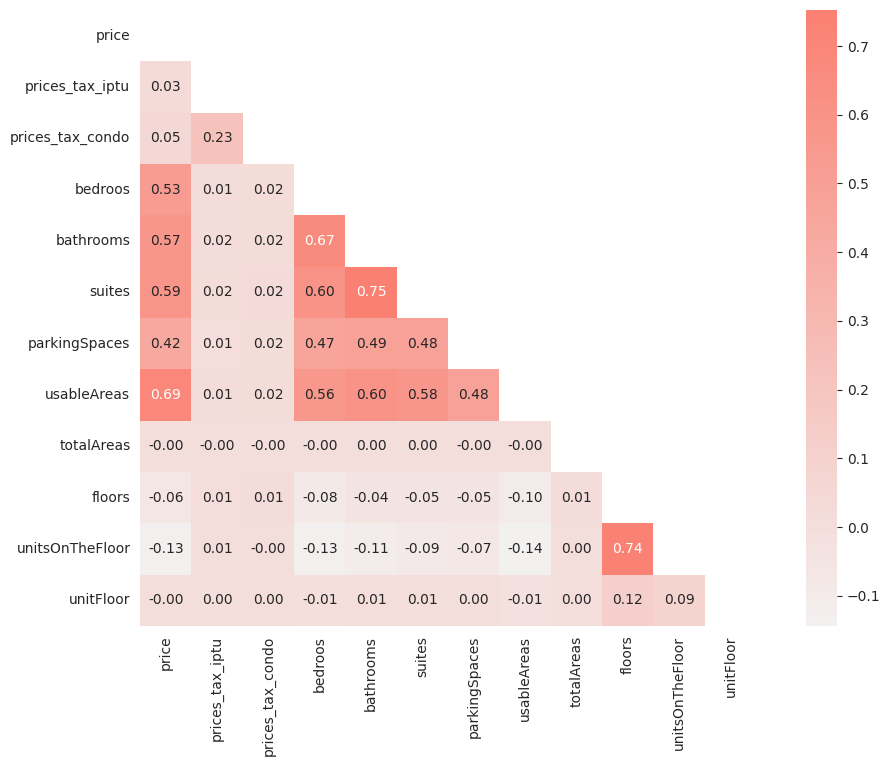

In [43]:
# visualzación de las correlaciones
cores = sns.color_palette('light:salmon', as_cmap=True) # generamos color para el grafico
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True # creamos una mascara para ver solo algunos puntos de la tabla

# Generamos una figura

with sns.axes_style('white'):
  f, ax = plt.subplots(figsize=(13,8)) # la figura va a ser de 13*8 y la guardamos en f y el contenido en ax
  ax = sns.heatmap(corr,cmap=cores, mask=mask, square= True,fmt='.2f', annot=True) # generamos un mapa de calor (heatmap)


analisis de la distribucion de la variable respuesta


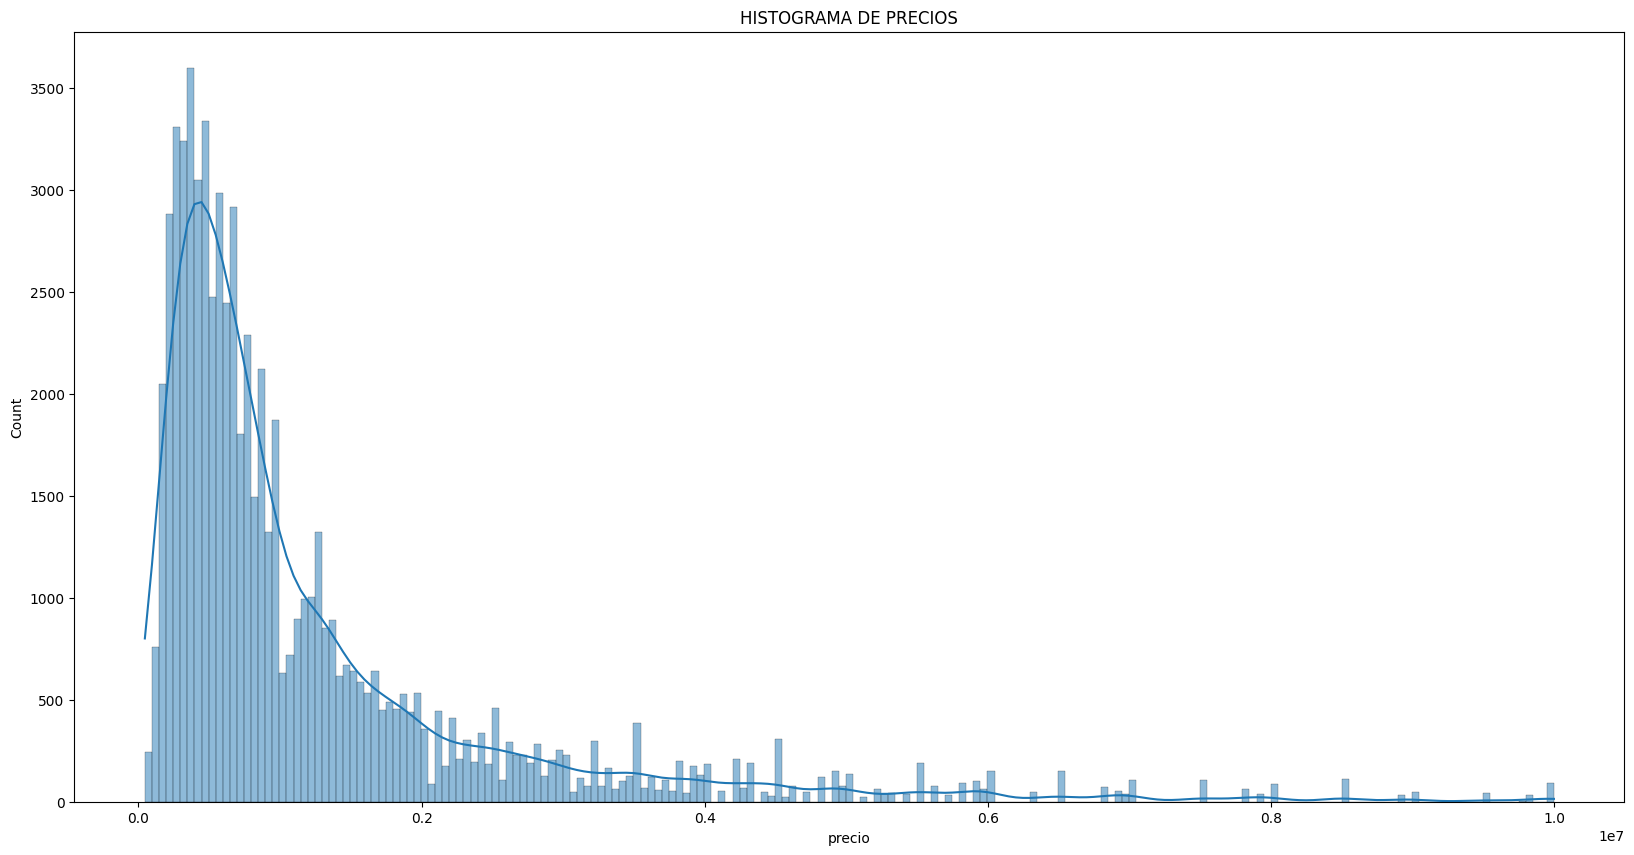

In [45]:
# antes (distribución asimetrica a la derecha)
ax = sns.histplot(data=datos_inmueble, x = 'price',kde = True) # histplot (grafico de barras)
ax.figure.set_size_inches(20,10) # tamaño del grafico
ax.set_title('HISTOGRAMA DE PRECIOS') #Titulo del grafico
ax.set_xlabel('precio'); # nombre del eje X.


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
la grafica anterior nos muestra que la distribución es asimetrica y para la regresión lineal necesitamos tener una distribución simetrica por eso tenemos que trabajar en para hacer esto tenmos que trabjar la columna precio

**TRANSFORMACIÓN DE LAS VARIABLES**

Estamos realizando una transformacion logaritmica de las variables para obtener  una distribución simetrica (más cerca a lo normal), por lo que podemos usar el modelo de regresión lineal, la transformacion realizada es:
                 
                  **log1p = log(1+x)**

Recuerda realizar la operación inversa para obtener el valor original

                  **expm1 = exp(x)-1

                  


In [46]:
#Para hacer la conversión de distribuciones usamos la función sklearn preprossecessing llamada functiontrnasformer

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True) # convertimos los valores numericos a la funcion logaritmica (log1p)
datos_transformados = transformer.transform(datos_inmueble.select_dtypes(exclude=['object'])) # excluimos los datos de tipo texto (object) ya que solo podemos aplicar la función a valores numericos


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [47]:
# Vamos a guardar los datos numericos transfomados y los datos de texto en un mismo data frame
#creamos una variable donde vamos a extraer el nombre de las columnas con los datos numericos con el metodo .columns
columnas_datos_transformados = datos_inmueble.select_dtypes(exclude=['object']).columns

#ahora unimos los datos object con la funcion include con nuestro dataframe datos_transformados y damos un nuevo nombre en este caso columas_datos_transfomados
df_transformado = pd.concat([datos_inmueble.select_dtypes(include=['object']),pd.DataFrame(datos_transformados, columns=columnas_datos_transformados)], axis=1)
df_transformado.head()

,unit,zone,price,prices_tax_iptu,prices_tax_condo,bedroos,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


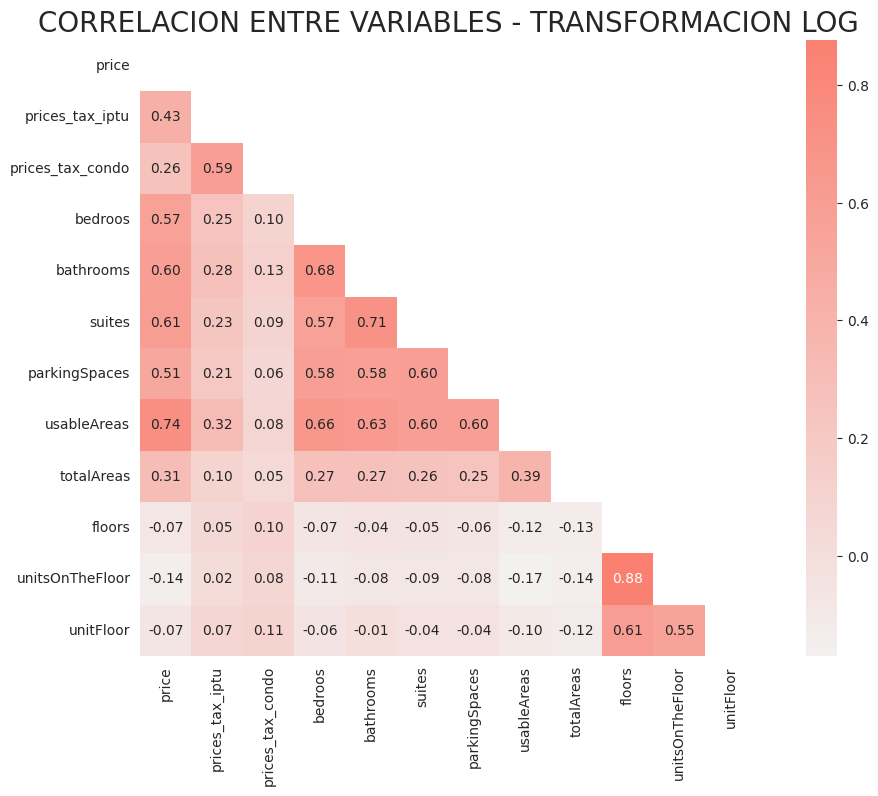

In [48]:
# Generamos un grafico de cuadros como el anterior para ver si tenemos diferencias o lo tenemos igual

correlacion_transformada = df_transformado.corr(numeric_only=True)
mask=np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask) ] = True
with sns.axes_style('white'):
  f,ax = plt.subplots(figsize=(13,8))
  ax = sns.heatmap(correlacion_transformada, cmap= cores,mask=mask, square= True, fmt='.2f',annot = True)
  ax.set_title('CORRELACION ENTRE VARIABLES - TRANSFORMACION LOG', fontsize= 20)


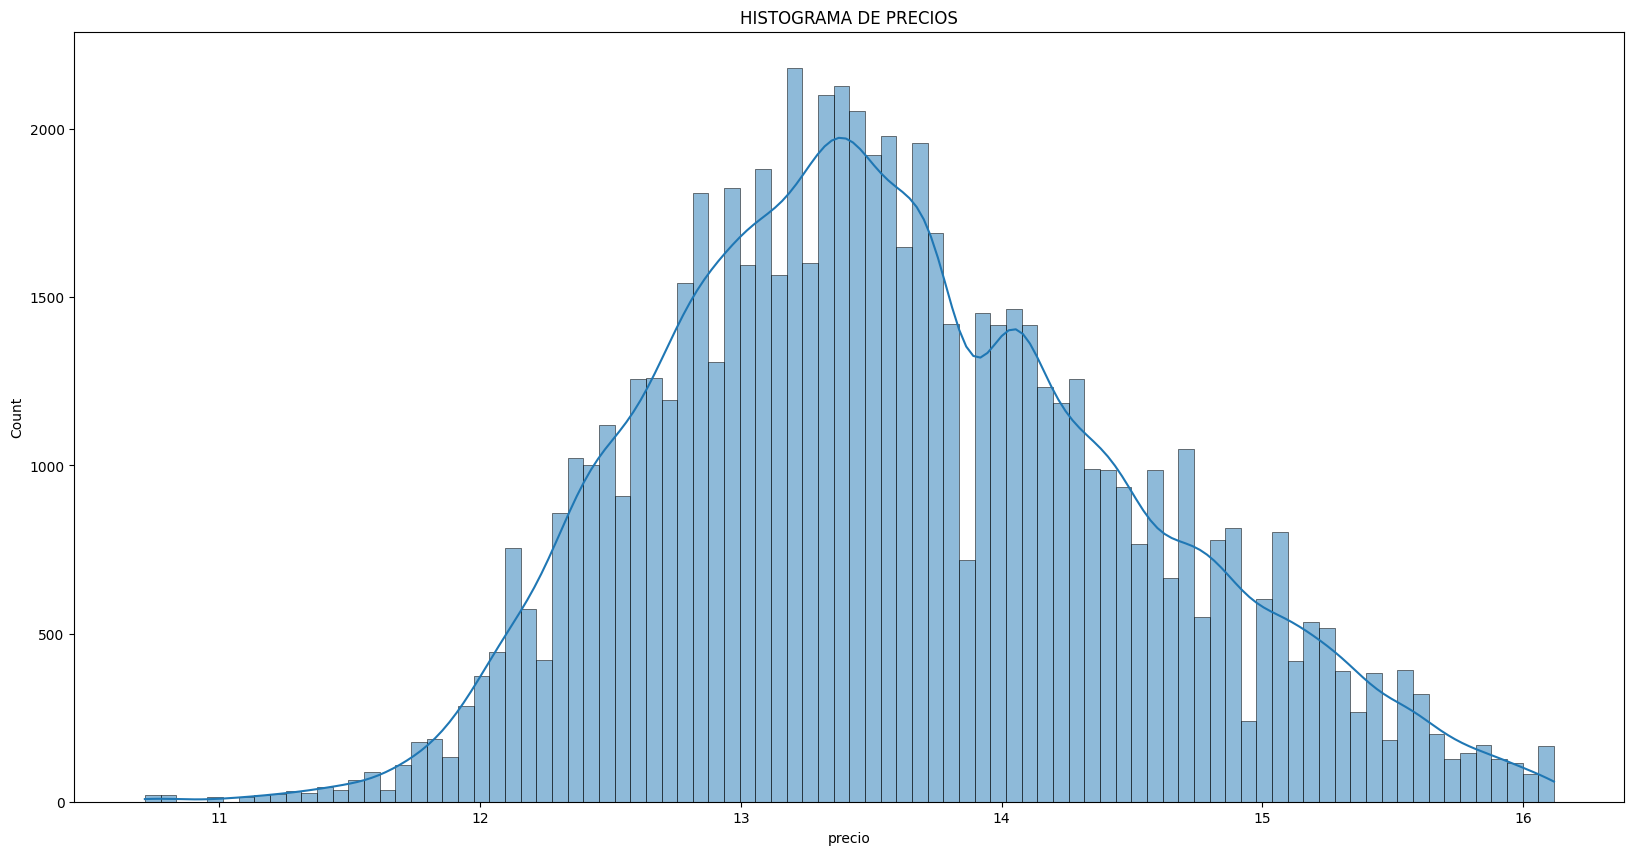

In [49]:
# repetimos el diagrama de distribucion para ver si ya tenemos nuestra distribucion dimetrica

ax= sns.histplot(data=df_transformado, x='price', kde = True)
ax.figure.set_size_inches(20,10) # tamaño del grafico
ax.set_title('HISTOGRAMA DE PRECIOS') #Titulo del grafico
ax.set_xlabel('precio'); # nombre del eje X

Dummies

In [50]:
# Vamos a convertir los valores de texto a valores numericos para que la maquina pueda interpretarlos

# Separamos las columnas con valores de texto
variables_categoricas = df_transformado.select_dtypes(include=['object']).columns
variables_categoricas

Index(['unit', 'zone'], dtype='object')

In [51]:
# Vamos a usar la función get dummies de pandas que transforma texto a numeros
df_dummies = pd.get_dummies(df_transformado[variables_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


juntamos los dataFrame df_dummies y datos]_transformados en uno nuevamwnte


In [52]:
datos_inmueble_dummies = pd.concat([df_transformado.drop(variables_categoricas,axis = 1), df_dummies], axis=1)
datos_inmueble_dummies

,price,prices_tax_iptu,prices_tax_condo,bedroos,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000,False,True,False,False,False,True,False
69584,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000,False,True,False,False,False,True,False
69585,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000,True,False,False,False,False,False,True
69586,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294,False,True,False,False,False,True,False


# **2.2 REGRESION LINEAL**



*   El analisis de la regresión se refiere al estudio de la dependencia de una variable, la variable dependiente, en ralación con una o mas variables, las variables explicaticvas , con el objetivo de estimar y/o el valor del medio (de la población) de la primera en terminos de valores conocidos o fijados (muestreos repetidos) de estos ultimos.

*   Regresión simple: la variable dependiente (y) esta relacionada con una unica variable explicativa (x).

*   Regresión multiple: la variable dependiente (y) esta relacionada con mas de una variable explicativa (x1)




# **2.3 AJUSTE Y PREDICCION**

# **Division de los datos**

In [53]:
# Variables independientes
x= datos_inmueble_dummies.drop('price', axis=1) # son todas las variables menos la que queremos pronosticar (en este caso el precio)

# variable dependiente
y= datos_inmueble_dummies['price']

In [54]:
# Para entrenar a la maquina tenemos que separar los datos en: datos de entrenamiento y en datos de prueba
# los datos de entrenamiento son los que le voy a enseñar a la maquina para que la maquina aprenda
# Los datos de prueba los vamos a utilizar para saber si las predicciones estan bien o no

# usamos la biblioteca de sklearn train_test_split

from sklearn.model_selection import train_test_split

In [55]:
# Division de conjunto de entrenamiento y prueba

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=42) #le decimos que tome el 30% de los datos para pruebas (test_size) y el 70% para entrenamiento

# nos genera 4 variables x entrenamiento y x prueba al igual que y prueba y entrenamiento

#**Modelo**

In [56]:
# Importamos el primer modelo de regresión lineal

from sklearn.linear_model import LinearRegression


In [57]:
# Inicializamos el modelo en blanco (lr en este caso)

lr= LinearRegression()

In [58]:
# Entrenamiento (con nuestras variables de entrenamiento x_train y y_train) y la función fit

lr.fit(x_train, y_train) # x tiene todas las variables de datos menos precio y y tiene solamente la variable de precio

LinearRegression()

In [59]:
# Prueba: para pprobar realizamos una predicción, usamos la función predict y la variable x_test(x de prueba)

prediccion_lr = lr.predict(x_test)

In [60]:
# Resultados de la predicción
prediccion_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [61]:
# Transformación inversa  traemos los precios de su expresión logaritmica a su expresión exponencial nuevamente

np.expm1(13.25768024)

572448.7513552749

#**2.4 METRICA DE DESEMPEÑO**



# COEFICIENTE DE DETERMINAION


*   Determinar que tan bien se ajusta una linea de regresion muestral  a los datos
*   r2 se encuentra entre 0 y 1
*   r2 mide la proporción o porcentaje de la variación total de Y explicada por el modelo de regresión







In [62]:
# importamos biblioteca r2

from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.7880682093407632

#**3 ARBOL DE DECISIÓN PARA REGRESIÓN**

Este modelo sirve tanto para regresión como para clasificación

Es una estrctura de arbol similar a un diagrama de flujo

Ventajas

*   las tomas de decisiones son mas eficaces
*   facilidad de uso
*   rapido y exaustivo

Desventajas

*   son inestables
*   tienden a sobreentrenamiento
*   










#**3.1 IMPLEMENTANDO EL MODELO**

In [63]:
# Importando biblioteca sklear para usar el modelo de decisiontree

from sklearn.tree import DecisionTreeRegressor

In [64]:
# inicializamos el modelo
dtr= DecisionTreeRegressor(random_state=42, max_depth=5)  # Guardamos el modelo en una variable, max_depht nos permite definir la profundidad del arbol en este caso 5 niveles


In [65]:
# entrenamiento
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [66]:
# prueba
prediccion_dtr = dtr.predict(x_test)


In [67]:
# Resultados de la predicción
prediccion_dtr


array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Grafico de error de predicción muestra los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos esterían alineados en una linea de 45°

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


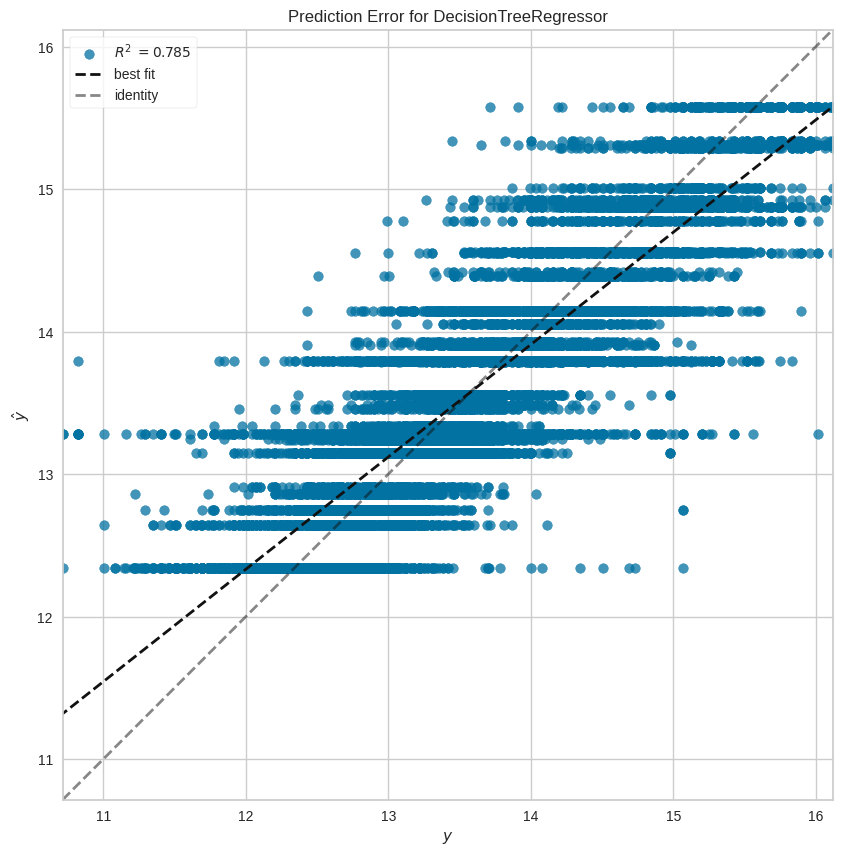

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<bound method Visualizer.poof of PredictionError(ax=<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=DecisionTreeRegressor(max_depth=5, random_state=42))>

In [68]:
from yellowbrick.regressor import prediction_error

fig, ax = plt.subplots(figsize=(10, 10)) # definimos el tamaño del grafico
pev = prediction_error(dtr, x_train, y_train, x_test, y_test, ax=ax) # generamos el grafico
pev.fit(x_train, y_train) # entrenamiento
pev.score(x_test, y_test) # evaluamos el modelo
pev.poof  # dibujamos el grafico

#**3.2 METRICAS**

In [69]:
# Coeficiente de determinaci

r2_lr = r2_score(y_test, prediccion_dtr)
r2_lr

0.7846916218477393

#**4 RANDOM FOREST PARA REGRESIÓN**


Es un conjunto de varios arboles de decisiónes ejecutándose al mismo tiempo con diferentes nodos principales y diferentes tomas de decisión y diferentes resultados pero utilizan los mismos datos e intentan pronosticar el mismo resultado en este caso el precio de venta, dandonos la opcion de escoger el resultado mas optimo para nuestro modelo ML

ventajas


*   reduce la ocurrencia de overfiting (sobre entrenamiento)
*   es flexible
*   trabaja bien con datos nulos datos faltantes
*   es mas preciso que un arbol de decisión
*   Es adecuado para bigdata


Desventajas


*   tiende a ser complejo
*   demanda mas poder computacional









#**4.1 MODELO ENSAMBLE**

Revisar documentación biblioteca SKLEAR-RANDOMFOREST

#**4.2 PREDICCIÓN**

**OBSERVACIÓN**: los parametros son practicamente los mismos entre DesicionTreeRegressor() y RandonForestRegressor(), con la excepción  de:


*   n_strimators: numero de arboles en el bosque
*   bootstrap: define si se utilizará el metodo de muestreo estadistico bootstrap
*   oob_score: define si se utilizará el metodo de muestreo out_of_bag para medir los errores de predicción
*   n_jobs. numero de jobs que se ejecutaran en paralelo (computación paralela - procesadores)
*   warm_start: adecuacion de un nuevo bosque o usa uno existente
*   max_samples: en caso de que bootstrap sea True, define el numero de muestras que se extraerán de X para entrenar cada arbol base







In [70]:
# Importamos librerias

from sklearn.ensemble import RandomForestRegressor

In [71]:
rf= RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10,) # inicializamos

In [72]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [73]:
prediction_rf = rf.predict(x_test)

**Grafico de error de la prediccion**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


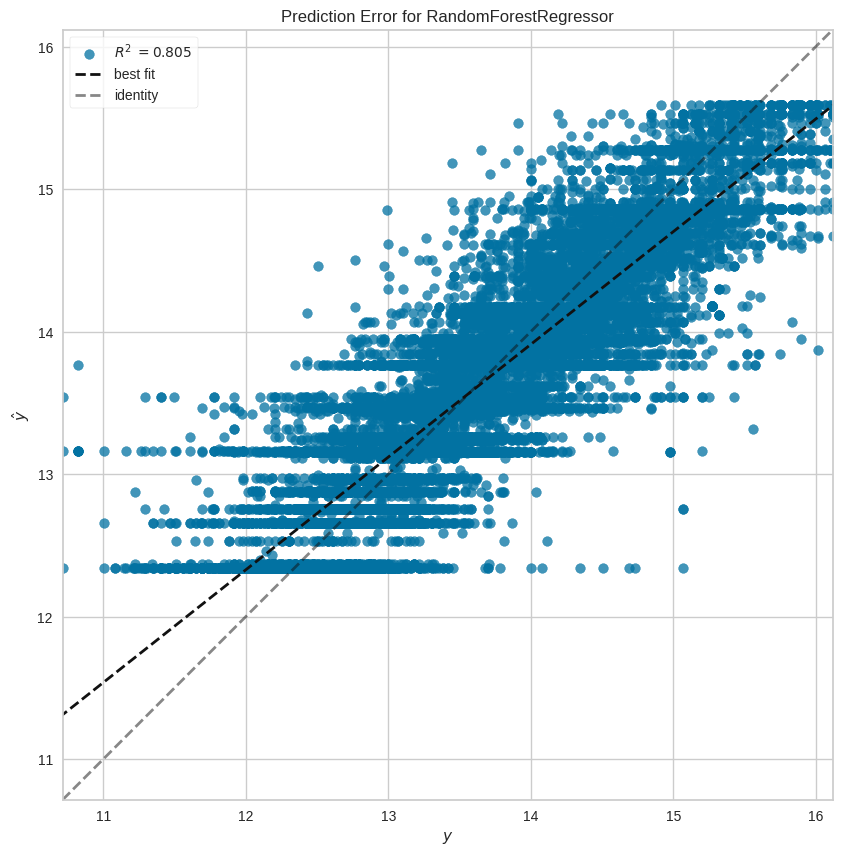

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<bound method Visualizer.poof of PredictionError(ax=<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=RandomForestRegressor(max_depth=5, n_estimators=10,
                                                random_state=42))>

In [74]:
from yellowbrick.regressor import prediction_error

fig, ax = plt.subplots(figsize=(10, 10)) # definimos el tamaño del grafico
pev = prediction_error(rf, x_train, y_train, x_test, y_test, ax=ax) # generamos el grafico
pev.fit(x_train, y_train) # entrenamiento
pev.score(x_test, y_test) # evaluamos el modelo
pev.poof  # dibujamos el grafico

#**4.3 METRICA DE DESEMPEÑO**

In [75]:
# COEFICIENTE DE DETERMINACIÓN
r2_rf = r2_score(y_test, prediction_rf)
r2_rf

0.805273364453047

#**5 TECNICAS DE OPTIMIZACIÓN**


#**5.1 TECNICAS DE OPTIMIZACION**

1. Cross Validation (Validación Cruzada)
Documentación Cross-validation

Cross Validation es una técnica ampliamente utilizada para evaluar el rendimiento de los modelos y la consiguiente verificación de tendencias en el aprendizaje automático. Consiste en particionar los datos en subconjuntos (partes), donde un subconjunto se usa para entrenamiento y otro subconjunto se usa para probar y evaluar el rendimiento del modelo.

¡Los datos particionados son los datos de entrenamiento (70% de los datos originales)!

K-fold: el conjunto de entrenamiento se divide aleatoriamente en K subconjuntos de aproximadamente el mismo tamaño, luego se realizan K iteraciones, donde los subconjuntos K-1 son para entrenamiento y 1 para validación.

El rendimiento calculado por validación cruzada k-fold es el promedio de todos los valores calculados en cada iteración.

2. Randomized Parameter Optimization (Optimización Aleatoria de Parámetros)
Documentación Randomized Search

Artículo científico sobre Random Search

"Define un espacio de búsqueda como un dominio acotado de valores de hiperparámetros y puntos de muestra aleatorios en ese dominio".

Imagen en el artículo sobre cómo funciona esta búsqueda

#**5.2 OPTIMIZANDO EL ARBOL DE DECISIÓN**


In [76]:
# División del data set en 3

from sklearn.model_selection import KFold

# definiendo el k  - numero de subconjuntos
cv = KFold(n_splits=5, shuffle=True) # shuffle para mezclar los datos (escoge conjuntos al azar)



#**Crossvalidation**

In [77]:
from sklearn.model_selection import cross_val_score



In [78]:
accuracy_cross_val_r2 = cross_val_score(estimator=dtr, # el modelo que queremos validar
                                        X = x_train,
                                        y = y_train,
                                        scoring= 'r2', # validamos la precision de cada ejecución
                                        cv = cv) # numero de subconjuntos
print('Accuracy promedio de r2: {}'.format(round(accuracy_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.782


#**Random Search Validation**

In [79]:
# Seleccion de Hiperparametros

param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'], # cules son los criterios de división de nodos
    'max_depth': [6,8,10,12,14,16], # profundidad del arbol
    'min_samples_leaf': [6,8,10], # numero minimo de muestras en cada hoja
    'min_samples_split': [8,10,12,14,16], # numero minimo de muestras para dividir un nodo
    'max_features': ['sqrt','log2', 'auto'], # numero de caracteristicas para dividir un nodo
}



In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
ramdon_cv_dt = RandomizedSearchCV(
    dtr, # modelo a optimizar
    param_random_dt, # parametros
    n_iter=5, # veces a ejecutar el modelo
    cv = cv, # numero de subconjuntos
    scoring = 'r2', # coeficiente de determinación
    n_jobs= -1    # la cantidad de tareas
    )

In [83]:
ramdoncv_dtr = ramdon_cv_dt.fit(x_train, y_train) # entrenamos el modelo

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [84]:
pd.DataFrame(ramdoncv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008790,0.000385,0.000000,0.000000,10,6,auto,6,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,0.074135,0.003198,0.006038,0.000371,14,10,log2,8,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.796366,0.790529,0.794745,0.801141,0.800029,0.796562,0.003814,2
2,0.009141,0.002366,0.000000,0.000000,8,6,auto,8,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.107328,0.004360,0.008845,0.003506,14,10,log2,14,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.840757,0.837111,0.838808,0.846898,0.842496,0.841214,0.003370,1
4,0.008056,0.000218,0.000000,0.000000,12,10,auto,6,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [85]:
# la mejor convinación

ramdoncv_dtr.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [86]:
# mejor score
ramdoncv_dtr.best_score_

0.8412140551706075

#**Random Search Test**

In [90]:
# Inicializamos el modelo con la convinacion de datos que nos da la optimización

dtr_optimizado = DecisionTreeRegressor(min_samples_split= 14,
                                       min_samples_leaf = 6,
                                           max_depth = 14,
                                           max_features = None,
                                           criterion = 'squared_error'
                                       )

In [91]:
# entrenamos el modelo optimizado

dtr_optimizado.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=6, min_samples_split=14)

In [92]:
prediccion_dtr_optimizado = dtr_optimizado.predict(x_test)

In [93]:
r2_score(y_test, prediccion_dtr_optimizado)

0.863433652014632

#**OPTIMIZANDO EL BOSQUE DE ARBOLES DE DECISIÓN**

# Cross Validation

In [94]:
accuracyRF_cross_val_r2 = cross_val_score(estimator=rf, # el modelo que queremos validar
                                        X = x_train,
                                        y = y_train,
                                        scoring= 'r2', # validamos la precision de cada ejecución
                                        cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracyRF_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.801


# Random Search Validation


Definiendo parametros

In [95]:
param_random_rf = {
        'n_estimators': [150, 200,],
        'max_depth': [20,30],
        #'max_samples_split': [8,10],
        'min_samples_leaf': [3],
}

In [96]:
# inicializamos
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv = cv,
    scoring = 'r2',
    n_jobs= -1,
    random_state= 42 # semilla
    )

In [98]:
rf_randomcv = random_cv_rf.fit(x_train, y_train)

In [99]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,54.207871,3.778138,0.709456,0.127624,150,3,20,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",0.892587,0.899041,0.893982,0.896848,0.890756,0.894643,0.002966,4
1,71.225606,1.248671,1.098077,0.371662,200,3,20,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",0.892642,0.899115,0.894263,0.897053,0.891039,0.894823,0.002925,2
2,53.867728,1.336591,0.812572,0.241337,150,3,30,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",0.892608,0.899105,0.894072,0.896821,0.890794,0.894680,0.002964,3
3,69.600124,7.634848,0.973967,0.202277,200,3,30,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",0.892700,0.899168,0.894333,0.897033,0.891067,0.894860,0.002919,1


In [100]:
rf_randomcv.best_params_

{'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 30}

In [101]:
rf_randomcv.best_score_

0.8948602783812646

#Random Search Test

In [103]:
rf_optimizado2 = RandomForestRegressor(n_estimators=  200,
     min_samples_leaf=3,)


In [104]:
rf_optimizado2.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=200)

In [105]:
prediction_rf_optimizado2 = rf_optimizado2.predict(x_test)

In [106]:
r2_score(y_test, prediction_rf_optimizado2)

0.8956148066505355

#**5.4 ESCOGIENDO EL MEJOR MODELO**

In [107]:
# Tabla de resultados

print('random search')
print('='*30)
print("arbol de decisión : %f" % r2_score(y_test, prediccion_dtr_optimizado))
print("random forest : %f" %r2_score(y_test, prediction_rf_optimizado2))
print('*'*30)

print('cross validation')
print('='*30)
print("arbol de decisión : %f" % round(accuracy_cross_val_r2.mean(),3))
print("random forest : %f" % round(accuracyRF_cross_val_r2.mean(),3))

random search
arbol de decisión : 0.863434
random forest : 0.895615
******************************
cross validation
arbol de decisión : 0.782000
random forest : 0.801000


In [108]:
x_train

,prices_tax_iptu,prices_tax_condo,bedroos,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
21547,4.762174,6.746412,1.098612,0.693147,0.000000,0.693147,3.970292,3.970292,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
43181,0.000000,6.216606,1.791759,1.386294,0.693147,1.386294,5.564520,5.564520,0.000000,0.000000,0.000000,False,True,False,False,False,True,False
2325,0.000000,5.442418,1.098612,0.693147,0.000000,0.000000,4.262680,4.262680,0.000000,0.000000,0.000000,True,False,False,False,True,False,False
34447,0.000000,6.685861,1.386294,1.098612,0.693147,1.098612,4.477337,4.477337,1.386294,2.397895,1.098612,True,False,False,False,False,True,False
24645,2.397895,2.397895,1.386294,1.098612,0.693147,0.693147,4.382027,4.382027,0.000000,0.000000,0.693147,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.000000,0.000000,1.098612,1.098612,0.000000,1.098612,5.153292,5.153292,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
6265,0.000000,5.908083,1.098612,0.693147,0.000000,0.693147,3.891820,3.891820,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
54886,3.044522,3.044522,1.386294,1.098612,0.693147,0.693147,4.605170,4.605170,0.000000,0.000000,0.000000,True,False,False,False,False,False,True
860,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,4.204693,4.204693,0.000000,0.000000,0.000000,True,False,False,False,False,True,False


In [109]:
# provando el mejor modelo (los datos suministrados tienen que tener la misma estructura de los datos de entrenamoiento sin columnas en blanco y con el mismo tipo de datos x_train#)

#cliente = pd.dataFrame({'prices_tax_iptu':[4.6],	'prices_tax_condo':[5.45],	'bedroos':[2],	'bathrooms' :[2],	'suites':[1],	'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento' :[False],	'unit_Casa':[True],	'unit_Outros':[False],	'zone_Zona Central':[False],	'zone_Zona Norte': [False],	'zone_Zona Oeste':[True],	'zone_Zona Sul' :[False]})
cliente = pd.DataFrame({'prices_tax_iptu':[4.6],        'prices_tax_condo':[5.45],      'bedroos':[2],  'bathrooms' :[2],       'suites':[1],   'parkingSpaces':[1],    'usableAreas':[4],      'totalAreas':[4.68],    'floors':[0],   'unitsOnTheFloor':[0],  'unitFloor':[0],        'unit_Apartamento' :[0],    'unit_Casa':[1],     'unit_Outros':[0],  'zone_Zona Central':[0],    'zone_Zona Norte': [0],	'zone_Zona Oeste':[1],	'zone_Zona Sul' :[0]})
cliente

,prices_tax_iptu,prices_tax_condo,bedroos,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,2,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [110]:
# Verificamos el resultado

prediccion_cliente = rf_optimizado2.predict(cliente) # el modelo que utilizamos fue rf_optimizado2
np.expm1(prediccion_cliente) # el valor que va a devolver el modelo esta en expesión logaritmica por eso lo convertimos a su valor exponencial con np.expm1



array([283114.50356255])